# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [7]:
# imports
import numpy as np
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
pn.extension('plotly')
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [9]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
file_path = Path("Data/neighborhoods_coordinates.csv")
sfo_coords = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [18]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    mean_housing_year = sfo_data["housing_units"].groupby("year").mean()
    mean_housing_df = pd.DataFrame(mean_housing_year)
    mean_housing_df.columns = ['Mean Housing per Year']
    return mean_housing_df.plot.bar(title="San Francisco Mean Housing per Year", ylim=(370000,390000))

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    averages_by_year = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby("year").mean()
    return averages_by_year['gross_rent'].plot.line(title="Average Gross Rent Per Year",color="Orange")


def average_sales_price():
    """Average Sales Price Per Year."""
    averages_by_year = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby("year").mean()
    return averages_by_year['sale_price_sqr_foot'].plot.line(title="Average Price per SqFt by Year",color="Blue")



def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    avg_df = sfo_data.groupby(["year",'neighborhood']).mean().reset_index()
    return avg_df.hvplot.line(x='year',y='sale_price_sqr_foot', groupby="neighborhood").opts(title="Average Sales per Sq Ft per Year by Neighborhood")


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top10 = sfo_data.groupby('neighborhood').mean().nlargest(10,'sale_price_sqr_foot').reset_index()
    return top10.hvplot.bar(title="Top 10 Most Expensive Neighborhoods to own per square foot", x='neighborhood', y="sale_price_sqr_foot", rot=45)

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    avg_df = sfo_data.groupby(["year",'neighborhood']).mean().reset_index()
    sales_plot=avg_df.hvplot.line(x='year',y='sale_price_sqr_foot', groupby="neighborhood").opts(title="Average Sales per Sq Ft per Year by Neighborhood") 
    rental_plot = avg_df.hvplot.line(x='year',y='gross_rent', groupby="neighborhood").opts(title="Average Rent per Year by Neighborhood")
    return sales_plot + rental_plot
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    top10 = sfo_data.groupby('neighborhood').mean().nlargest(10,'sale_price_sqr_foot').reset_index()
    return px.parallel_coordinates(top10, color='sale_price_sqr_foot')


def parallel_categories():
    """Parallel Categories Plot."""
    top10 = sfo_data.groupby('neighborhood').mean().nlargest(10,'sale_price_sqr_foot').reset_index()
    return px.parallel_categories(top10, dimensions =["neighborhood", "sale_price_sqr_foot", "housing_units","gross_rent"], color = "sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)



def neighborhood_map():
    """Neighborhood Map."""

# Create a scatter mapbox to analyze neighborhood info
    neighborhood_means = sfo_data.groupby('neighborhood').mean().reset_index()
    sfo_coords_avg_values = pd.concat([sfo_coords, neighborhood_means], axis=1, join="inner").drop("neighborhood",axis=1)
    return px.scatter_mapbox(sfo_coords_avg_values,lat="Lat",lon="Lon",size="sale_price_sqr_foot",color="gross_rent",zoom=10,hover_name='Neighborhood')


def sunburst():
    """Sunburst Plot."""
    top10 = sfo_data.groupby('neighborhood').mean().nlargest(10,'sale_price_sqr_foot').reset_index()
    df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(top10["neighborhood"])]
    df = df_expensive_neighborhoods_per_year.reset_index()
    return px.sunburst(df, path=['year', 'neighborhood'], values='sale_price_sqr_foot', color = "gross_rent",color_continuous_scale='Blues')

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02403')
        [1] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive02573')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive02579')
            [2] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive02585')
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive02410')
                        [0] HoloViews(Layout, name='interactive02410')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                            [1] VSpacer()
            [1] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Bars, name='interactive02487')
        [3] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02592')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02598')
        [4] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02605')

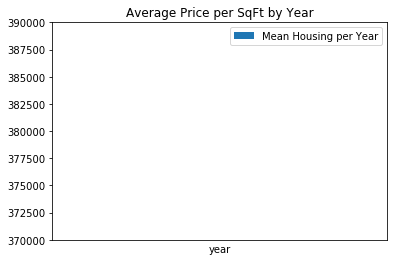

In [19]:
# Create a Title for the Dashboard
title = "# Real Estate Analysis of San Fransisco 2010-2016"


# Create a tab layout for the dashboard
welcome_col = pn.Column(neighborhood_map)
neighborhood_col = pn.Column(most_expensive_neighborhoods_rent_sales, top_most_expensive_neighborhoods )
yearly_col = pn.Column(housing_units_per_year, average_gross_rent, average_sales_price)
parallel_col = pn.Column(parallel_coordinates, parallel_categories)
sunburst_col = pn.Column(sunburst)



# Create the dashboard
dashboard = pn.Column(
    title,
    pn.Tabs(
        ("Welcome",welcome_col),
        ("Yearly Market Analysis",yearly_col),
        ("Neighborhood Analysis",neighborhood_col),
        ("Parallel Plots Analysis",parallel_col),
        ("Sunburst",sunburst_col)
    )
)
dashboard

## Serve the Panel Dashboard

In [ ]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()